In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import re
from matplotlib.ticker import MultipleLocator
import calendar

In [3]:
source_file = 'Bean there done that data.xlsx'
bean_data = pd.read_excel(source_file, sheet_name='Inventory (finished product)')

In [5]:
numeric_columns = ['Stock level', 'Scrapped', 'Unit price', 'Stock value', 'Demand', 'Supply']
for col in numeric_columns:
    bean_data[col] = bean_data[col].astype(str).str.replace(r'[^-\d.,]', '', regex=True)
    bean_data[col] = bean_data[col].str.replace(',', '.')
    bean_data[col] = bean_data[col].replace({'': '0', '-': '0'})  # Replace '-' with '0'
    bean_data[col] = bean_data[col].astype(float)


In [6]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [18]:
def abbreviate_month(month_name):
    try:
        month_num = list(calendar.month_name).index(month_name)
        return calendar.month_abbr[month_num]
    except ValueError:
        return month_name

In [28]:
def plot_demand_vs_stock(product_df, product_name, ax):
    product_df['Month'] = pd.Categorical(product_df['Month'], categories=month_order, ordered=True)
    product_df = product_df.sort_values('Month')

    x = np.arange(len(product_df))

    demand = product_df['Demand'].values
    stock_level = product_df['Stock level'].values

    ax.plot(x, demand, color='lightgray', linestyle='--', linewidth=2, label='Demand')

    Z = 1.645
    demand_values = product_df['Demand'].values
    mean_demand = np.mean(demand_values)
    std_demand = np.std(demand_values, ddof=1)
    lead_time = 1
    safety_stock = Z * std_demand * np.sqrt(lead_time)
    target_stock = mean_demand + safety_stock

    ax.plot(x, [target_stock]*len(x), color='black', linestyle=':', linewidth=2, label='Target Stock')
    ax.plot(x, stock_level, color='cornflowerblue', linestyle='-', linewidth=2, label='Stock Level')

    if demand.min() < 0:
        ax.axhline(0, color='grey', linestyle=':', linewidth=1)
        negative_indices = np.where(demand < 0)[0]

        ax.scatter(x[negative_indices], demand[negative_indices], color='lightgray', marker='o')

        for idx in negative_indices:
            ax.text(x[idx] - 0.2, demand[idx], f'{int(demand[idx])}', color='black', fontsize=8, ha='right', va='center')

    # Set X-axis with abbreviated month names
    abbreviated_months = product_df['Month'].apply(abbreviate_month)
    ax.set_xticks(x)
    ax.set_xticklabels(abbreviated_months, rotation=0)

    # Format Y-axis: ticks every 10K and start from 0
    ax.yaxis.set_major_locator(MultipleLocator(10000))
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y/1000)}K' if y > 0 else '0'))  # Updated formatting
    ax.set_ylim(bottom=0)  # Start Y-axis at 0

    # Extract country name from product name
    match = re.search(r'\(COO (.+?)\)', product_name)
    if match:
        country_name = match.group(1)
    else:
        country_name = product_name  # Use full product name if pattern doesn't match

    # Set subplot title to country name only
    ax.set_title(f'{country_name}', fontsize=12, pad=10)

    # Remove axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove plot frame
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Adjust labels to be close to the lines on the right side and make them bold
    label_offset = 0.3  # Base horizontal offset for labels

    # Collect the y-values at the right end
    line_end_points = [
        {'y': demand[-1], 'label': 'Demand', 'color': 'lightgray', 'x_offset': label_offset},
        {'y': stock_level[-1], 'label': 'Stock Level', 'color': 'cornflowerblue', 'x_offset': label_offset},
        {'y': target_stock, 'label': 'Target Stock', 'color': 'black', 'x_offset': label_offset}  # Adjust as needed
    ]

    # Sort by y to determine positions
    line_end_points.sort(key=lambda k: k['y'])

    # Assign vertical offsets to avoid overlapping
    min_spacing = 2000  # Minimum vertical spacing between labels
    for i, point in enumerate(line_end_points):
        if i == 0:
            adjusted_y = point['y']
        else:
            previous_y = line_end_points[i - 1]['adjusted_y']
            # Ensure that labels do not overlap
            if point['y'] - previous_y < min_spacing:
                adjusted_y = previous_y + min_spacing
            else:
                adjusted_y = point['y']
        point['adjusted_y'] = adjusted_y
        # Add label next to the line with individual x_offsets and make them bold
        ax.text(x[-1] + point['x_offset'], adjusted_y, point['label'],
                va='center', ha='left', color=point['color'], fontweight='bold')

    # Set X-axis limits
    max_label_offset = max(point['x_offset'] for point in line_end_points)
    ax.set_xlim(-0.5, len(x) - 0.5 + max_label_offset + 0.5)


In [26]:
# Filter data for Coffee Beans only
df_beans = bean_data[bean_data['Product'].str.contains('roast')]

# Get list of unique Coffee Beans products
products = df_beans['Product'].unique()

# Determine the number of products
num_products = len(products)

C:\Users\anita\AppData\Local\Temp\ipykernel_11160\2834035799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Month'] = pd.Categorical(product_df['Month'], categories=month_order, ordered=True)
C:\Users\anita\AppData\Local\Temp\ipykernel_11160\2834035799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Month'] = pd.Categorical(product_df['Month'], categories=month_order, ordered=True)
C:\Users\anita\AppData\Local\Temp\ipykernel_11160\2834035799.py:2: SettingWithCopyWarning: 
A 

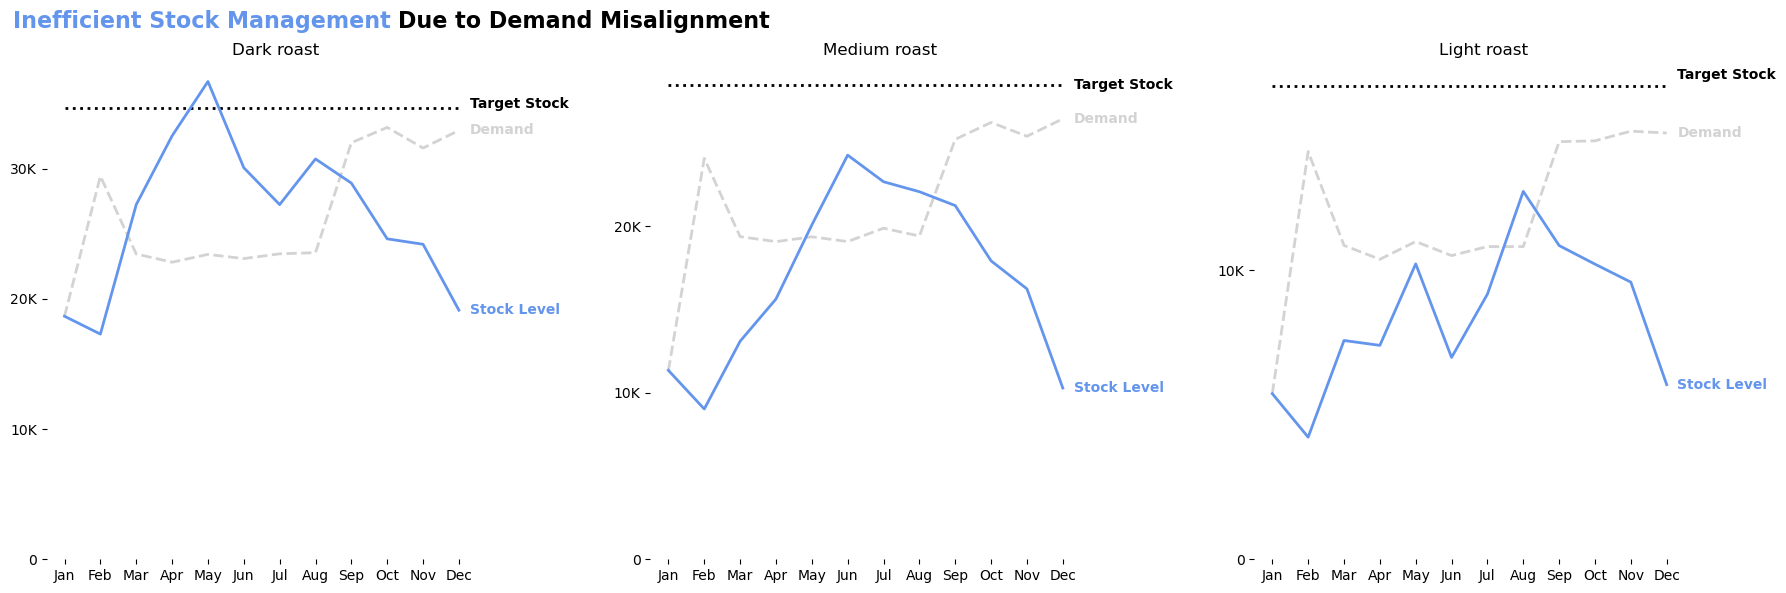

In [29]:
# Check if there are products to plot
if num_products == 0:
    print("No data available to plot.")
else:
    # Define number of columns and rows for subplots
    cols = 3  # Adjust the number of columns as needed
    rows = max(1, (num_products + cols - 1) // cols)  # Ensure at least one row

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows), sharey=False)

    # Flatten axes array for easy iteration
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]

    # Plot each product
    for ax, product in zip(axes, products):
        product_df = df_beans[df_beans['Product'] == product]
        plot_demand_vs_stock(product_df, product, ax)

    # Remove unused subplots
    for ax in axes[len(products):]:
        fig.delaxes(ax)

    # Remove the existing main title
    # fig.suptitle('Inefficient Stock Management Due to Demand Misalignment', fontsize=16, x=0.01, y=1.02, ha='left')

    # Add custom title with colored text
    title_x = 0.01  # x position in figure coordinates
    title_y = 0.98  # y position in figure coordinates (adjusted to fit within the figure)

    # Add the first part of the title in cornflowerblue color and bold
    title_part1 = 'Inefficient Stock Management '
    text1 = fig.text(title_x, title_y, title_part1, fontsize=16, ha='left', va='top', color='cornflowerblue', fontweight='bold')

    # Use the renderer to get the width of the first part
    renderer = fig.canvas.get_renderer()
    bbox = text1.get_window_extent(renderer=renderer)
    width_inch = bbox.width / fig.dpi
    fig_width = fig.get_figwidth()
    width_fig = width_inch / fig_width

    # Add the second part of the title in black color and bold
    title_part2 = 'Due to Demand Misalignment'
    fig.text(title_x + width_fig, title_y, title_part2, fontsize=16, ha='left', va='top', color='black', fontweight='bold')

    # Adjust layout to add space between subplots
    plt.tight_layout(rect=[0, 0, 1, 0.95], w_pad=3, h_pad=3)

    # Display the plot
    plt.show()
